# **10. Random Forest Algorithm**

**Random Forest Overview**

Random Forest is an ensemble algorithm that combines multiple decision trees to improve prediction and accuracy. It builds a **"Forest"** of decision trees by creating each tree with different with different samples of the data, both in terms of rows (bootstrap resampling technique) and columns (using feature selection). Once all trees make their predictions, Random Forest aggregates these predictions by majority voting (for classification), and averaging (by regression), yielding a final and more robust prediction. This reduces overfitting and increases generalizability compared to a single Decision Tree.

**How Random Forest Extends Decision Trees**

A Decision Tree is a structure of if-else conditions that splits the data based on feature values, attempting to create the most homogenous classes at each node. While effective, a single Decision Tree can be highly sensitive to noise and can easily overfit. Random Forest addresses this issue by creating many trees and ensuring they're diverse through both bootstrapping (sampling with replacement) and feature bagging (using random feature subsets at each split). This prevents any single tree from dominating the model, thus reducing the variance and making the resilient to overfitting.

**Random Feature Selection**

One unique feature of Random Forest is its use of random feature selection at each split, which introduces further variation among trees in the forest. Rather than considering all features for every split (like a decision tree), Random Forest only considers a subset, allowing weaker features to play a role and making each tree less correlated with others. The result is a powerful ensemble that performs well on large datasets with complex feature interactions.

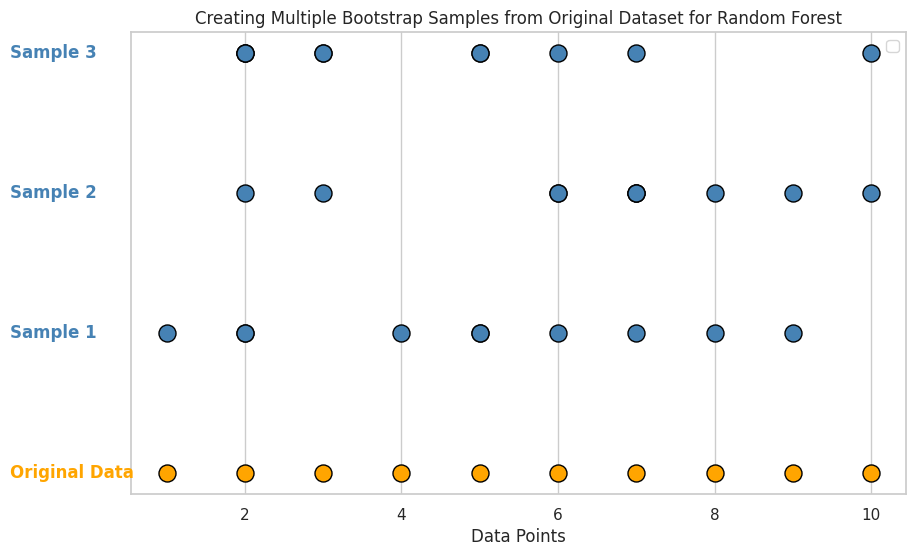

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Original dataset represented by 10 items
original_data = np.arange(1, 11)

# Plot original dataset
ax.scatter(original_data, [0] * len(original_data), color="orange", s=150, edgecolor="black")
ax.text(-1, 0, "Original Data", va="center", fontsize=12, color="orange", weight="bold")

# Create multiple bootstrap samples (3 in this example)
for i in range(1, 4):
    sample = np.random.choice(original_data, size=len(original_data), replace=True)  # Bootstrap sample with replacement
    ax.scatter(sample, [i] * len(sample), color="steelblue", s=150, edgecolor="black")
    ax.text(-1, i, f"Sample {i}", va="center", fontsize=12, color="steelblue", weight="bold")

# Adjust plot appearance
ax.set_yticks([])
ax.set_xlabel("Data Points")
ax.set_title("Creating Multiple Bootstrap Samples from Original Dataset for Random Forest")
ax.legend(loc="upper right")
plt.show()



### **Explanation of the Diagram:**

- **Original Dataset**: The first row in orange represents the original dataset.
- **Bootstrap Samples**: The rows below show three bootstrap samples (each in blue) generated from the original dataset. Each sample has randomly selected data points, with some values potentially appearing multiple times due to sampling with replacement.
- **Random Forest Construction**: Each sample is used to train a separate decision tree in the Random Forest.

This simple, focused diagram highlights how Random Forest uses bootstrap sampling to create multiple datasets from the original data, building a “forest” of diverse decision trees.

## **1. Digits Dataset Classification:**

The `load_digits()` function from the `sklearn.datasets` module loads the Digits dataset, which is used for digit recognition tasks. This dataset is not a DataFrame but an object of type `Bunch`. This object behaves like a dictionary and contains several attributes.

Here are some key components of the `digits` object:

- **`digits.data`**: A 2D NumPy array of shape (n_samples, n_features), where each row represents a sample (a digit image) and each column represents a pixel.
- **`digits.target`**: A 1D NumPy array of shape (n_samples,) that contains the label (0-9) corresponding to each digit image.
- **`digits.images`**: A 3D NumPy array of shape (n_samples, 8, 8), representing the actual images of the digits in an 8x8 format.
- **`digits.DESCR`**: A string describing the dataset.

In [29]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [17]:
# 1. Load the digits dataset, perform some manipulation and standardization
digits = load_digits()
df = pd.DataFrame(digits.data)
df['target'] = digits.target

df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


<Figure size 640x480 with 0 Axes>

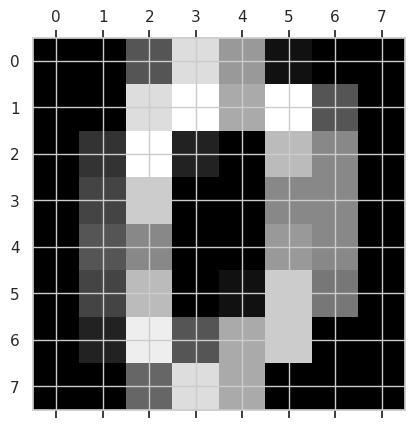

0


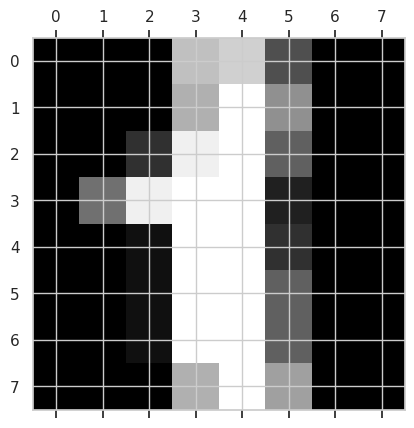

1


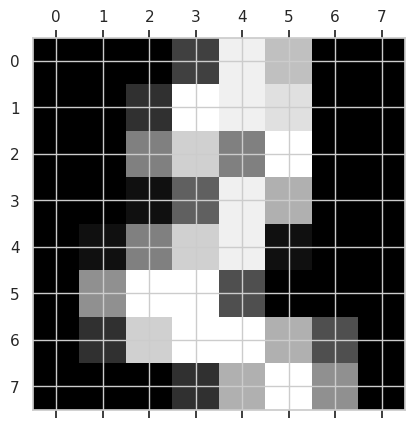

2


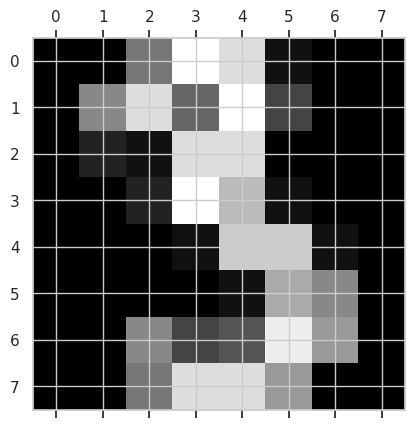

3


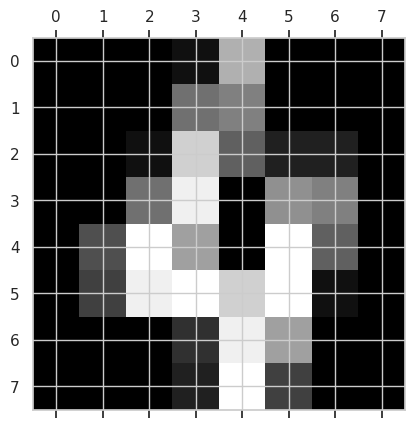

4


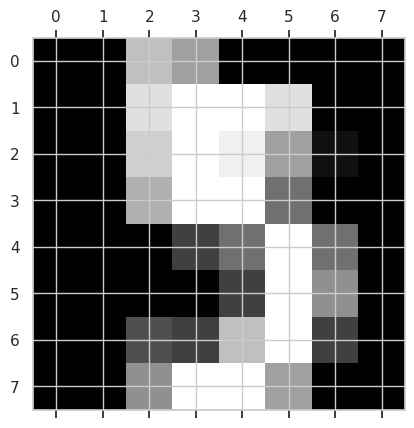

5


In [25]:
# 2. Do some plotting
plt.gray()
for i in range(6):
  plt.matshow(digits.images[i])
  plt.show()
  print(digits.target[i])

In [26]:
# 2. Split the data into train-test components
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# 3. Fit Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42) # set estimators = 100, fix bootstrap samples at 42
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

In [31]:
# 4. Create confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 38]])

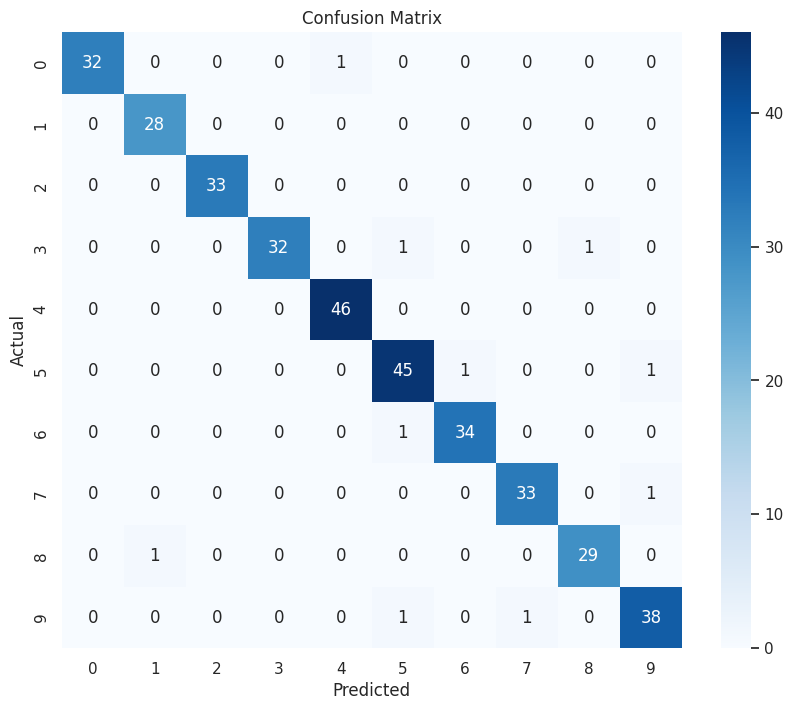

In [33]:
# 5. Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This confusion matrix represents the results of a classification model, showing how many predictions were correct and incorrect for each class. In the case of the **digits dataset**, we are dealing with a classification of digits 0-9, and the confusion matrix displays the true positive (diagonal), false positive, and false negative values for each class.

Here’s a breakdown of the matrix:

- **Diagonal elements (True Positives)**: These are the values where the model correctly predicted the digit. For example:
  - The model correctly identified 32 instances of digit **0**.
  - The model correctly identified 28 instances of digit **1**.
  - The model correctly identified 33 instances of digit **2**, and so on for all digits.

- **Off-diagonal elements (False Positives and False Negatives)**: These represent misclassifications. For example:
  - The model predicted **0** for 1 instance that was actually a **4** (row 0, column 4).
  - The model predicted **6** for 1 instance that was actually a **5** (row 5, column 6).

### Summary of Performance:
- The **diagonal** values show the number of correct predictions for each class. The higher these values are, the better the model is at correctly identifying the digit.
- The **off-diagonal** values show where misclassifications are happening. For instance:
  - The model confused **0** and **4** once, and **5** and **6** once.
  - There are a few instances where digits are misclassified, but the model still performs fairly well, as seen by the high diagonal values.

### Interpretation:
- The model is performing well overall, with most of the predicted digits appearing along the diagonal, meaning the model is accurately predicting the majority of the digits.
- There are some small misclassifications (off-diagonal values), but they are relatively few compared to the correct predictions.


## **2. Iris Dataset Classification**


In [36]:
# 1. Load and manipulate the iris dataset
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
# 2. Perform encoding on the 'Species' column
df['species'] = pd.Categorical(df['species'])
df['species_n'] = df.species.cat.codes
df.head()

# Setosa = 0
# Versicolor = 1
# Virginica = 2

,sepal_length,sepal_width,petal_length,petal_width,species,species_n
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [43]:
# 3. Split into train-test components
X = df.drop(['species', 'species_n'], axis=1)
y = df['species_n']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# 4. Fit Random Forest Model and evaluate score
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [45]:
# 5. Create a confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

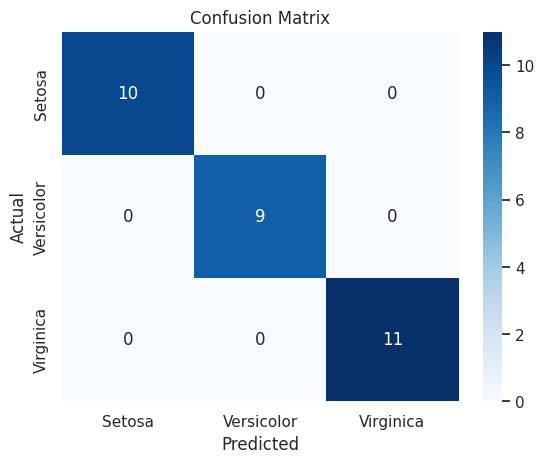

In [49]:
# 6. Create a heatmap
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Summary:**

- **Class 0**: There are 10 instances of **Class 0** correctly predicted as Class 0, with no misclassifications.
- **Class 1**: There are 9 instances of **Class 1** correctly predicted as Class 1, with no misclassifications.
- **Class 2**: There are 11 instances of **Class 2** correctly predicted as Class 2, with no misclassifications.

### **Conclusion:**
This confusion matrix indicates that the classifier has **perfect accuracy**, as all instances are correctly classified with no misclassifications.